 Import Libraries

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Load Dataset

In [13]:
df = pd.read_csv("/content/twitter_training.csv")





In [14]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [16]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Select Features (tweets) and Labels (sentiment)

In [17]:
X = df.iloc[:, 3].astype(str)
y = df.iloc[:, 2]

In [19]:
X

,"im getting on borderlands and i will murder you all ,"
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
74676,Just realized that the Windows partition of my...
74677,Just realized that my Mac window partition is ...
74678,Just realized the windows partition of my Mac ...
74679,Just realized between the windows partition of...


In [21]:
y

,Positive
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
74676,Positive
74677,Positive
74678,Positive
74679,Positive


 Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



 Convert Text → TF-IDF Vectors

In [25]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

 Train Decision Tree Classifier

In [26]:
dt_model = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

 Predictions

In [27]:
y_pred = dt_model.predict(X_test_tfidf)

Print Accuracy

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Decision Tree Accuracy: {accuracy * 100:.2f}%")



✅ Decision Tree Accuracy: 47.51%


Evaluation

In [28]:
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))



📊 Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.90      0.10      0.19      2598
    Negative       0.40      0.91      0.55      4509
     Neutral       0.64      0.32      0.43      3664
    Positive       0.63      0.37      0.46      4166

    accuracy                           0.48     14937
   macro avg       0.64      0.43      0.41     14937
weighted avg       0.61      0.48      0.43     14937



Confusion Matrix Visualization

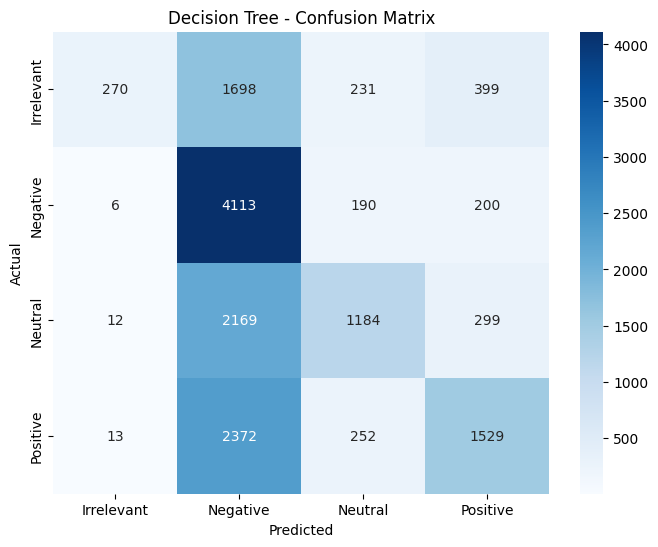

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()